In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

media_colormaps = ['Purples', 'Set2']

Shannon-Wiener diversity index of each medium:
    
$ H = -\sum \limits _{i=1} ^{s} p_{i} \log_2 p_{i} $
 
where $s$ is the number of metabolites and $p_{i}$ is the proportion of the medium made of metabolite $i$.

Source: http://scikit-bio.org/docs/0.5.6/generated/skbio.diversity.alpha.shannon.html?highlight=shannon#skbio.diversity.alpha.shannon

The more unequal the abundances of the types, the smaller the corresponding Shannon entropy. If practically all abundance is concentrated to one type, and the other types are very rare (even if there are many of them), Shannon entropy approaches zero. When there is only one type in the dataset, Shannon entropy exactly equals zero (there is no uncertainty in predicting the type of the next randomly chosen entity). 

In [3]:
def shannon(p_row, base=2):
    freqs = np.array(p_row, dtype='float')
    nonzero_freqs = freqs[freqs.nonzero()]

    return -(nonzero_freqs * np.log(nonzero_freqs)).sum() / np.log(base)

In [4]:
new_labels = {'Diabetes 2': 'diabetes2', 'EU avg': 'EU_avg', 'Gluten free': 'gluten_free', 
              'High fat': 'high_fat', 'High fiber': 'high_fiber', 'High protein': 'high_protein', 
              'Mediterranean': 'mediterranean', 'Unhealthy': 'unhealthy', 'Vegan': 'vegan', 'Vegetarian': 'vegetarian'}

In [5]:
media_metabolite = pd.read_csv(os.environ['MICOM_EXP'] + 'materials/media/diets_1.03_overview.csv').T

media_metabolite = media_metabolite.rename(columns=media_metabolite.iloc[0], index=new_labels).drop(media_metabolite.index[0])

media_metabolite_p = media_metabolite.div(media_metabolite.sum(axis=1), axis='index')

# Remove metabolites that present in NO meida
media_metabolite_p = media_metabolite_p.loc[:, list(media_metabolite_p.sum() != 0.0)].astype('float')
media_metabolite_p

M_10fthf__91__e__93__  M_12dgr180__91__e__93__  \
DACH                    9.060902e-08                 0.000453   
diabetes2               1.331733e-07                 0.000444   
EU_avg                  4.073998e-08                 0.000407   
gluten_free             6.487027e-08                 0.000324   
high_fat                3.231779e-08                 0.000323   
high_fiber              1.322483e-07                 0.000441   
high_protein            1.181422e-07                 0.000394   
mediterranean           9.907752e-08                 0.000330   
unhealthy               2.464186e-08                 0.000246   
vegan                   1.652289e-07                 0.000551   
vegetarian              1.208624e-07                 0.000604   

               M_26dap_M__91__e__93__  M_2dmmq8__91__e__93__  \
DACH                         0.000453               0.000453   
diabetes2                    0.000444               0.000444   
EU_avg                       0.000407               0.000407   
gluten_free                  0.000324               0.000324   
high_fat                     0.000323               0.000323   
high_fiber                   0.000441               0.000441   
high_protein                 0.000394               0.000394   
mediterranean                0.000330               0.000330   
unhealthy                    0.000246               0.000246   
vegan                        0.000551               0.000551   
vegetarian                   0.000604               0.000604   

               M_2obut__91__e__93__  M_3mop__91__e__93__  M_4abz__91__e__93__  \
DACH                       0.000453             0.000453             0.000453   
diabetes2                  0.000444             0.000444             0.000444   
EU_avg                     0.000407             0.000407             0.000407   
gluten_free                0.000324             0.000324             0.000324   
high_fat                   0.000323             0.000323             0.000323   
high_fiber                 0.000441             0.000441             0.000441   
high_protein               0.000394             0.000394             0.000394   
mediterranean              0.000330             0.000330             0.000330   
unhealthy                  0.000246             0.000246             0.000246   
vegan                      0.000551             0.000551             0.000551   
vegetarian                 0.000604             0.000604             0.000604   

               M_4hbz__91__e__93__  M_5mthf__91__e__93__  M_ac__91__e__93__  \
DACH                      0.000453          9.060902e-08           0.000453   
diabetes2                 0.000444          1.331733e-07           0.000444   
EU_avg                    0.000407          4.073998e-08           0.000407   
gluten_free               0.000324          6.487027e-08           0.000324   
high_fat                  0.000323          3.231779e-08           0.000323   
high_fiber                0.000441          1.322483e-07           0.000441   
high_protein              0.000394          1.181422e-07           0.000394   
mediterranean             0.000330          9.907752e-08           0.000330   
unhealthy                 0.000246          2.464186e-08           0.000246   
vegan                     0.000551          1.652289e-07           0.000551   
vegetarian                0.000604          1.208624e-07           0.000604   

               ...  M_ttdca__91__e__93__  M_ttdcea__91__e__93__  \
DACH           ...              0.008355               0.000932   
diabetes2      ...              0.002438               0.000081   
EU_avg         ...              0.012308               0.001542   
gluten_free    ...              0.008370               0.000403   
high_fat       ...              0.003341               0.003457   
high_fiber     ...              0.000347               0.000014   
high_protein   ...              0.001676               0.000192   
mediter

In [6]:
shannon_df = media_metabolite_p.apply(shannon, axis=1).sort_values().to_frame(name=r'$H$')
shannon_df

$H$
high_fat       4.484433
gluten_free    4.611951
high_protein   4.755001
vegan          4.773763
mediterranean  4.804005
EU_avg         4.822309
vegetarian     4.876797
unhealthy      4.926290
diabetes2      4.966542
high_fiber     5.006734
DACH           5.013574

In [7]:
sns.color_palette(media_colormaps[0], shannon_df.shape[0])

[(0.9546482122260669, 0.9481430219146482, 0.9714878892733564),
 (0.9110957324106113, 0.9057439446366782, 0.9483275663206459),
 (0.8539792387543252, 0.8540099961553248, 0.9211072664359861),
 (0.7764705882352941, 0.7790849673202614, 0.8823529411764706),
 (0.698961937716263, 0.6965013456362938, 0.8372164552095348),
 (0.617762399077278, 0.6021376393694733, 0.7834525182622069),
 (0.5402537485582468, 0.5272126105344098, 0.747281814686659),
 (0.47320261437908495, 0.43267973856209146, 0.6993464052287581),
 (0.4136562860438293, 0.3137716262975778, 0.6373702422145329),
 (0.3568166089965398, 0.20525951557093425, 0.5856978085351787),
 (0.30131487889273356, 0.10076124567474048, 0.5367012687427912)]

In [8]:
shannon_color = pd.DataFrame(index=shannon_df.index)
shannon_color[r'$H$'] = sns.color_palette(media_colormaps[0], shannon_df.shape[0])
shannon_color

$H$
high_fat       (0.9546482122260669, 0.9481430219146482, 0.971...
gluten_free    (0.9110957324106113, 0.9057439446366782, 0.948...
high_protein   (0.8539792387543252, 0.8540099961553248, 0.921...
vegan          (0.7764705882352941, 0.7790849673202614, 0.882...
mediterranean  (0.698961937716263, 0.6965013456362938, 0.8372...
EU_avg         (0.617762399077278, 0.6021376393694733, 0.7834...
vegetarian     (0.5402537485582468, 0.5272126105344098, 0.747...
unhealthy      (0.47320261437908495, 0.43267973856209146, 0.6...
diabetes2      (0.4136562860438293, 0.3137716262975778, 0.637...
high_fiber     (0.3568166089965398, 0.20525951557093425, 0.58...
DACH           (0.30131487889273356, 0.10076124567474048, 0.5...

In [9]:
g = sns.clustermap(media_metabolite_p, method='average', metric='euclidean',
                   cmap='pink_r', row_colors=shannon_color[r'$H$'],
                   dendrogram_ratio=0.08, cbar_pos=(1.0, 0.2, 0.03, 0.5), cbar_kws={'label': 'Metabolite flux\n[mmol/person/day]'},
                   xticklabels=False, yticklabels=True, figsize=(15,10))

g.fig.suptitle('Hierarchical clustering of media', fontsize=35, y=1.02)

fig_name="./fig/classify_media.svg"
g.savefig(fig_name, transparent=True, bbox_inches='tight')
plt.close()

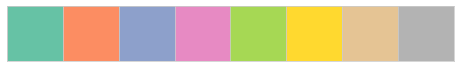

In [8]:
sns.palplot(sns.color_palette(media_colormaps[1], 8))

In [11]:
clusters = ['A1', 'A2a', 'A2b', 'B']
clustering = {'EU_avg': 'A1', 'mediterranean': 'A1', 
              'gluten_free': 'A2a', 'high_protein': 'A2a', 
              'vegetarian': 'A2b', 'vegan': 'A2b', 'DACH': 'A2b', 'diabetes2': 'A2b', 'high_fiber': 'A2b', 
              'high_fat':'B', 'unhealthy': 'B'}
clustering_df = pd.DataFrame.from_dict(clustering, orient='index', columns=['Cluster'])

c = dict(zip(clusters, sns.color_palette(media_colormaps[1], 8)[3:7] ))
clustering_color = pd.DataFrame(index=clustering_df.index)
clustering_color['Cluster'] = clustering_df['Cluster'].map(c)

In [12]:
data_df = pd.merge(shannon_df, clustering_df, left_index=True, right_index=True)
data_df

$H$ Cluster
high_fat       4.484433       B
gluten_free    4.611951     A2a
high_protein   4.755001     A2a
vegan          4.773763     A2b
mediterranean  4.804005      A1
EU_avg         4.822309      A1
vegetarian     4.876797     A2b
unhealthy      4.926290       B
diabetes2      4.966542     A2b
high_fiber     5.006734     A2b
DACH           5.013574     A2b

In [13]:
color_df = pd.merge(shannon_color, clustering_color, left_index=True, right_index=True)
color_df

$H$  \
high_fat       (0.9546482122260669, 0.9481430219146482, 0.971...   
gluten_free    (0.9110957324106113, 0.9057439446366782, 0.948...   
high_protein   (0.8539792387543252, 0.8540099961553248, 0.921...   
vegan          (0.7764705882352941, 0.7790849673202614, 0.882...   
mediterranean  (0.698961937716263, 0.6965013456362938, 0.8372...   
EU_avg         (0.617762399077278, 0.6021376393694733, 0.7834...   
vegetarian     (0.5402537485582468, 0.5272126105344098, 0.747...   
unhealthy      (0.47320261437908495, 0.43267973856209146, 0.6...   
diabetes2      (0.4136562860438293, 0.3137716262975778, 0.637...   
high_fiber     (0.3568166089965398, 0.20525951557093425, 0.58...   
DACH           (0.30131487889273356, 0.10076124567474048, 0.5...   

                                                         Cluster  
high_fat       (0.8980392156862745, 0.7686274509803922, 0.580...  
gluten_free    (0.6509803921568628, 0.8470588235294118, 0.329...  
high_protein   (0.6509803921568628, 0.8470588235294118, 0.329...  
vegan              (1.0, 0.8509803921568627, 0.1843137254901961)  
mediterranean  (0.9058823529411765, 0.5411764705882353, 0.764...  
EU_avg         (0.9058823529411765, 0.5411764705882353, 0.764...  
vegetarian         (1.0, 0.8509803921568627, 0.1843137254901961)  
unhealthy      (0.8980392156862745, 0.7686274509803922, 0.580...  
diabetes2          (1.0, 0.8509803921568627, 0.1843137254901961)  
high_fiber         (1.0, 0.8509803921568627, 0.1843137254901961)  
DACH               (1.0, 0.8509803921568627, 0.1843137254901961)

In [14]:
data_df.to_csv('./features/classify_media.data.tsv', sep='\t')
color_df.to_csv('./features/classify_media.color.tsv', sep='\t')